In [6]:
import os
# change directory in order to be able to import python scripts from the common package
if os.getcwd().endswith('coinrun'): os.chdir(os.path.expanduser(".."))

In [7]:
from env import VanillaEnv, CoinRunReplayBuffer
import numpy as np
import matplotlib.pyplot as plt
import os
import random


Done! Episode Reward:  6.414901960784315
(3, 64, 64)


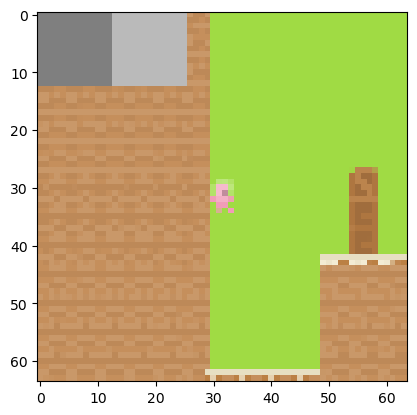

In [8]:
env =  VanillaEnv(start_level=1, num_levels=3)
state = env.reset()
done = False
rewards = []
frames_arr = []
env.seed(1)
np.random.seed(1)
while not done:
    action = np.random.randint(low=0, high=15)
    next_state, r, done, info = env.step(action)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[0].shape)
        plt.imshow(np.moveaxis(frames_arr[5], 0, -1), vmin=0., vmax=1.)
        break

In [9]:
env =  VanillaEnv(start_level=1, num_levels=3, render_mode="human")

In [10]:

state = env.reset()
done = False
rewards = []
frames_arr = []
env.seed(1)
np.random.seed(1)
for _ in range(20):
    action = 8
    next_state, r, done, info = env.step(action)
    print(r)
    rewards.append(r)
    frames_arr.append(state)
    state = next_state
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        print(frames_arr[0].shape)
        plt.imshow(np.moveaxis(frames_arr[5], 0, -1), vmin=0., vmax=1.)
        break
    

-0.08000000000000002
-0.0776470588235294
-0.07529411764705883
-0.07372549019607844
-0.07137254901960784
-0.06901960784313727
-0.06666666666666668
-0.06509803921568627
-0.06274509803921569
-0.061176470588235304
-0.059607843137254916
-0.05725490196078431
-0.05568627450980393
-0.05411764705882354
-0.05254901960784313
-0.050980392156862744
-0.07529411764705883
-0.10039215686274511
-0.09803921568627452
-0.09803921568627452


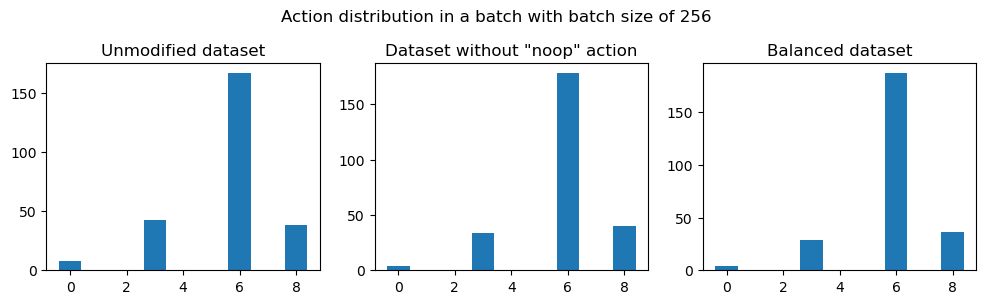

In [13]:
labels1, counts1 = [],[]
labels2, counts2 = [],[]
labels3, counts3 = [],[]

buffer = CoinRunReplayBuffer('cpu', 0, './coinrun/expert-dataset/easy')
image, action = buffer.sample(256)
labels1, counts1 = np.unique(action, return_counts=True)

buffer = CoinRunReplayBuffer('cpu', 2, './coinrun/expert-dataset/easy')
image, action = buffer.sample(256)
labels2, counts2 = np.unique(action, return_counts=True)

image, action = buffer.sample(256)
labels3, counts3 = np.unique(action, return_counts=True)

fig = plt.figure(figsize=(12, 3))
plot1 = fig.add_subplot(1, 3, 1)
plot2 = fig.add_subplot(1, 3, 2)
plot3 = fig.add_subplot(1, 3, 3)

plot1.bar(labels1, counts1, align='center')
plot2.bar(labels2, counts2, align='center')
plot3.bar(labels3, counts3, align='center')

plot1.set_title("Unmodified dataset")
plot2.set_title('Dataset without "noop" action')
plot3.set_title("Balanced dataset")

fig.suptitle("Action distribution in a batch with batch size of 256")
fig.subplots_adjust(top=0.80)
# plt.gca().set_xticks(labels1)
plt.savefig("action-dist.pdf")
plt.show()


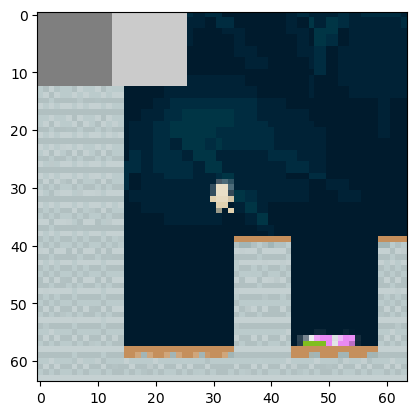

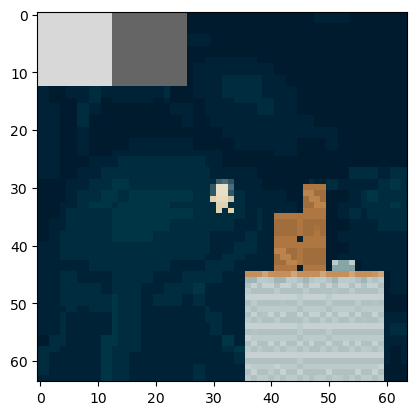

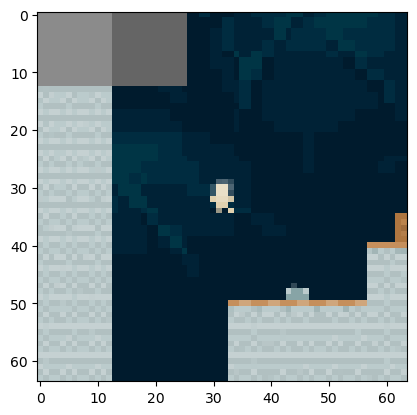

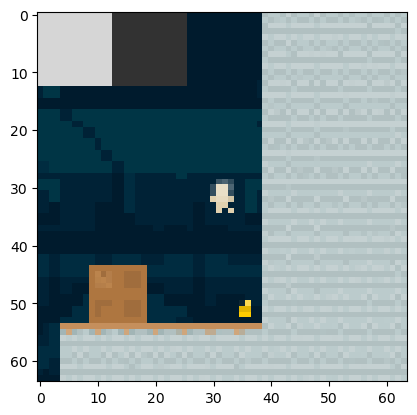

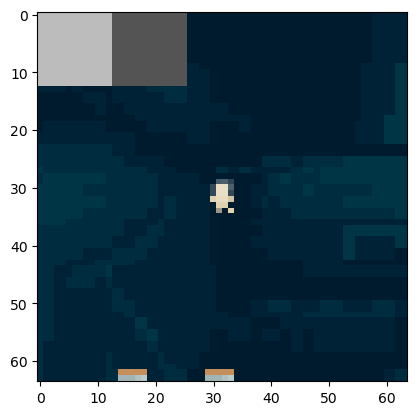

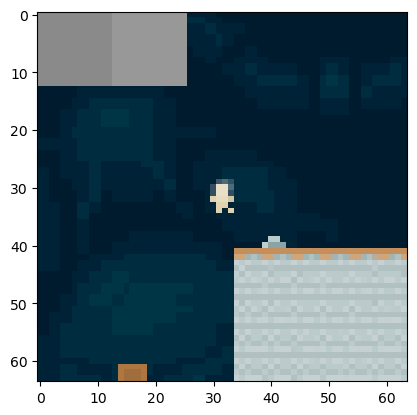

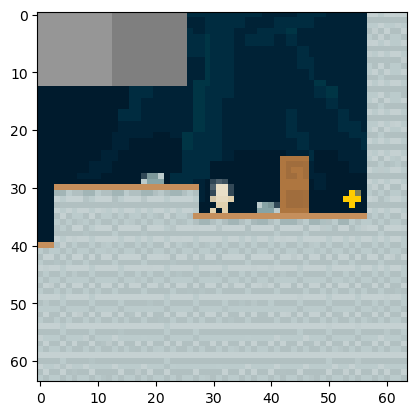

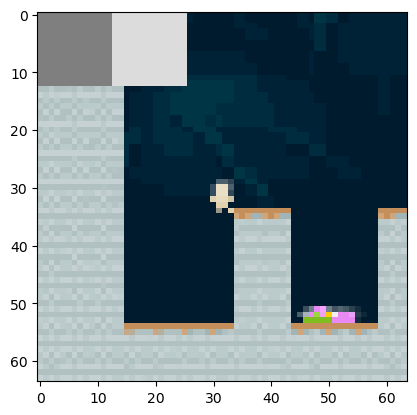

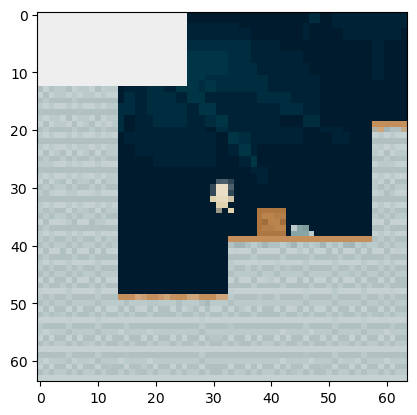

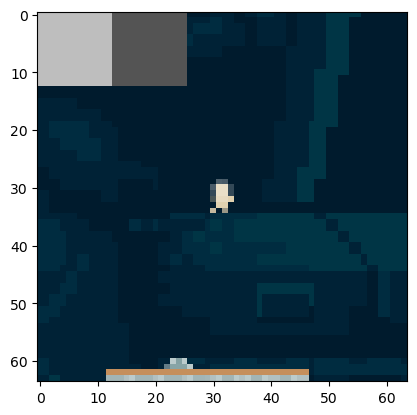

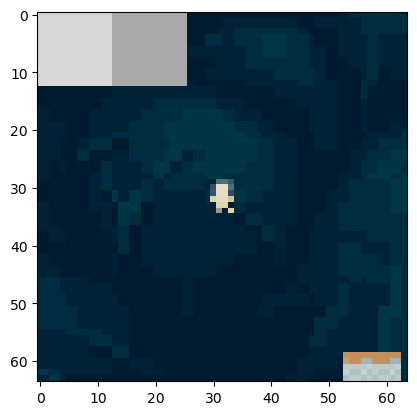

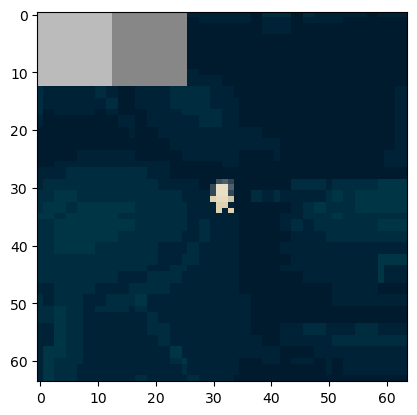

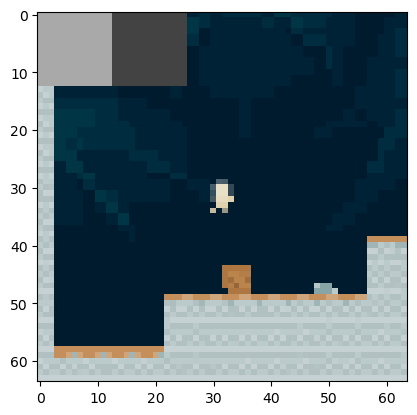

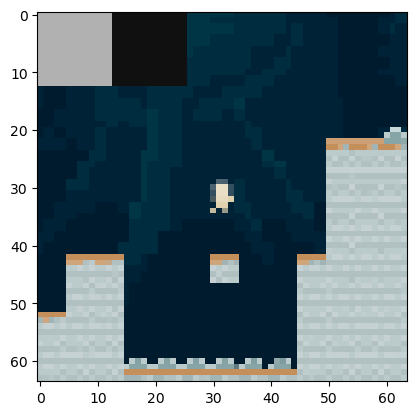

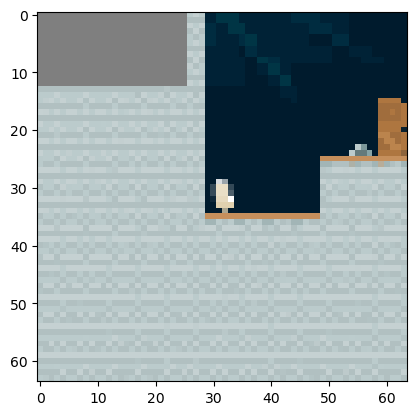

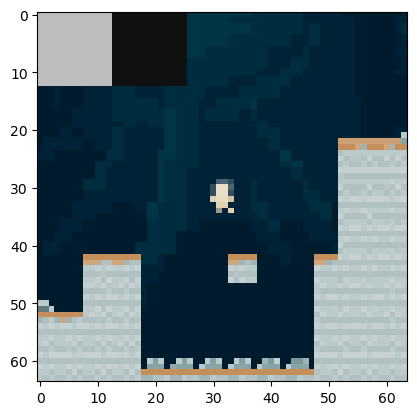

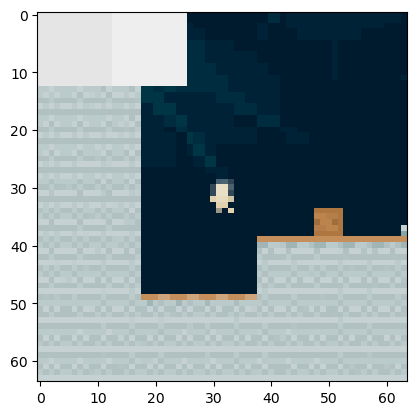

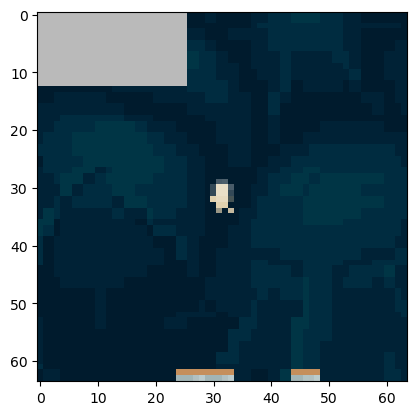

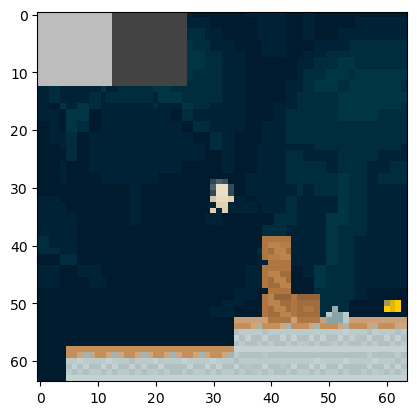

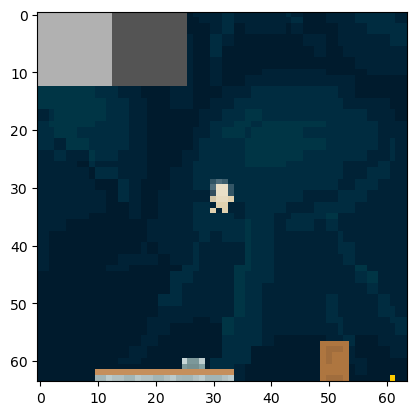

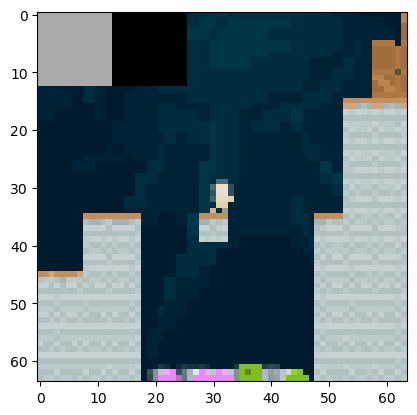

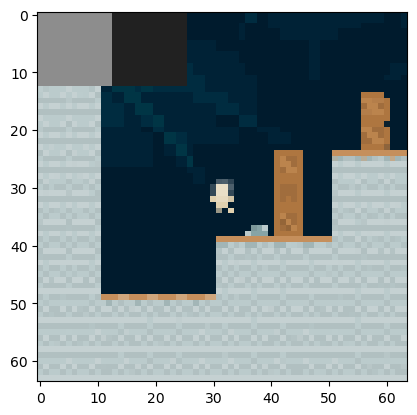

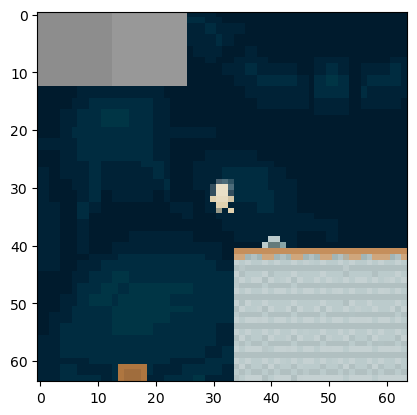

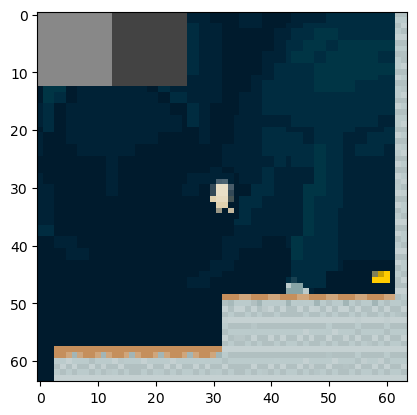

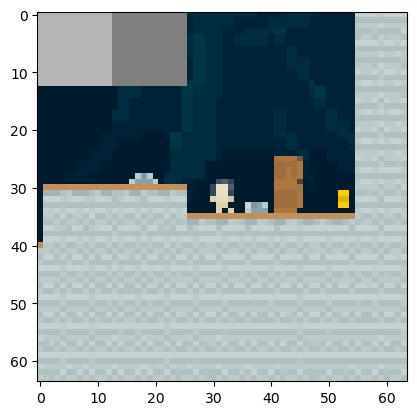

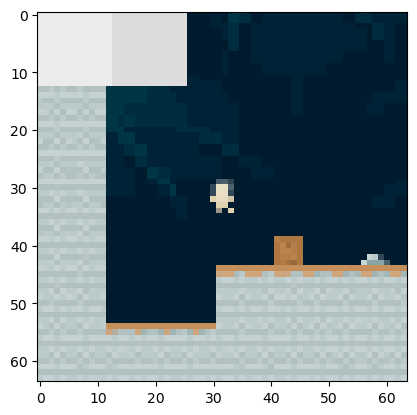

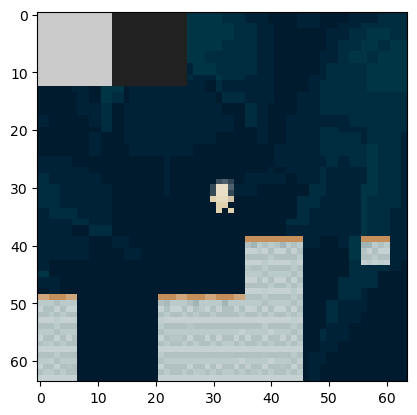

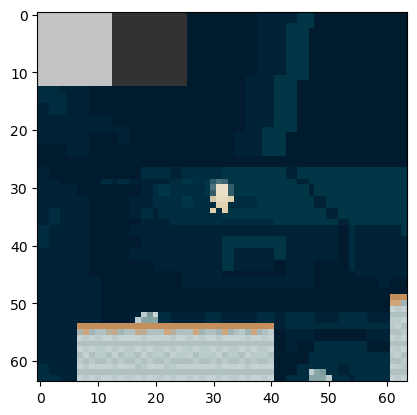

In [18]:
image, action = buffer.sample(256)

for i in range(len(image)):
    if action[i] == 3:
        plt.imshow(np.moveaxis(image[i].numpy(), 0, -1), vmin=0., vmax=1.)
        plt.show()